<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Numerical solution of the time‐independent Schrödinger equation
## TFY4170-Exercise3-2022-V1

### Quantum  Mechanics

<section class="post-meta">
By Pawel Sikorski, Department of Physics, NTNU
</section>
Last edited: March 11th 2022


### Before you start:


Study these three approached to numerically solve time-independent Schrödinger Equation in 1D.

https://nbviewer.org/urls/www.numfys.net/media/notebooks/schrodinger_equation.ipynb

https://nbviewer.org/urls/www.numfys.net/media/notebooks/eigenenergies_through_matrix_diagonalization.ipynb

https://nbviewer.org/urls/www.numfys.net/media/notebooks/ex_qm1_numerical_determination_of_eigenvalues_for_harmonic_oscillator.ipynb


Note. To do proper simulations of a physical system, one need to make sure that there is a link between units in the simulation and the physical world. In the examples above one assumes $\hbar=m=1$. This assumption is part of the atomic units systems, https://en.wikipedia.org/wiki/Hartree_atomic_units.

Distance and energy in these units can easily be converted to S.I. units. Please use S.I. units when reporting results and making plots. 

## Part 1

The finite potential square well, is similar to the infinite potential well (Section 14.15) but, in this case, the walls of the well are of finite height. See page 312 in the textbook for more details. 


### Part 1: To Do 
Using a method of choice, calculate allowed energy levels and plot wave function for a finite potential square well.  Experiment with different values for the well size and the potential difference between inside and outside the well.

In [10]:
#from __future__ import division
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from numpy import exp


# Number of grid points
N = 100

# Interval on the x-axis:
x_min = -5
x_max = 5
a = 2


dx = (x_max-x_min)/(N-1)

# Grid points
x = np.arange(x_min, x_max+dx, dx)

# Potential
V = []
for i in x:
    if -a < i < a: 
        V.append(0)
    else: 
        V.append(a)

# We define a N-by-N zero matrix:
H = np.zeros((N, N))

# Set the non-zero elements of the matrix:
for i in range(N):
    H[i][i] = (1/dx**2+V[i]) #Langs diagonalen blir elementene 
    if i > 0:
        H[i][i-1] = -1/(2*dx**2)
    if i < N-1:
        H[i][i+1] = -1/(2*dx**2)

E, psi = linalg.eigh(H) #Calculating the eigenvalues of the energy

for i in range(10):
    Estr = "E" + str(i) + ": "
    print(Estr, E[i])

E0:  0.19253521247076344
E1:  0.7519884162128795
E2:  1.592893019088228
E3:  2.30146129380536
E4:  2.5421851212693047
E5:  2.9808332514850244
E6:  3.6946060186605085
E7:  4.25525176629831
E8:  5.0562717126202825
E9:  6.018976610358348


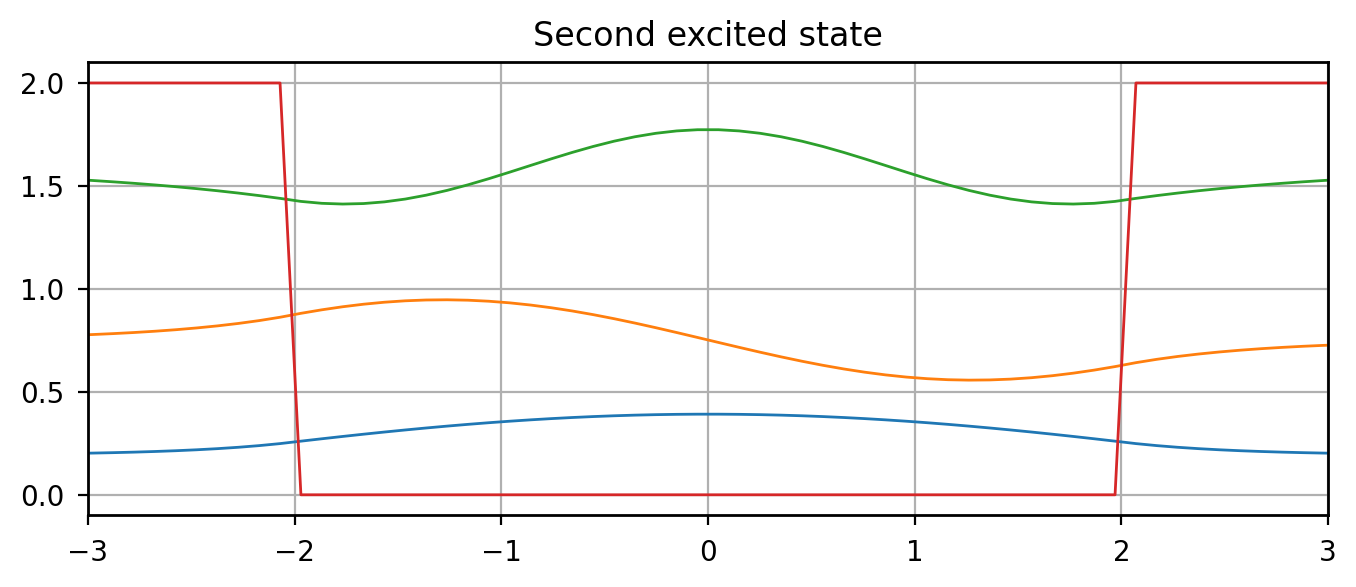

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set common figure parameters:
newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (8, 3),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 10, 'legend.frameon': False, 
             'legend.handlelength': 1.5, 'figure.dpi': 200}
plt.rcParams.update(newparams)

# Plot three lowest eigenstates
plt.figure()
plt.title("Ground state")
plt.plot(x, psi[:, 0] + E[0])
plt.xlim([-3, 3])
plt.grid()
#plt.figure()
plt.title("First excited state")
plt.plot(x, -psi[:, 1] + E[1])
plt.xlim([-3, 3])
plt.grid()
#plt.figure()
plt.title("Second excited state")
plt.plot(x, psi[:, 2] + E[2])
plt.xlim([-3, 3])
plt.grid()
plt.plot(x,V)

## Part 2


Read through this page that describes how harmonic oscillator approach can be used to study molecular vibrations: 
    
https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Physical_Chemistry_(LibreTexts)/05:_The_Harmonic_Oscillator_and_the_Rigid_Rotor/5.03:_The_Harmonic_Oscillator_Approximates_Vibrations    

Now we would like to study molecular vibrations using a more realistic form of the potential energy function, called the  Morse Potential (https://en.wikipedia.org/wiki/Morse_potential). The Morse Potential is a good approximation to  V(r)  and is best when looking for a general formula for all  r  from 0 to  $\infty$ , not just applicable for the local region around the  $r_o$. Paremeter $r$ represents interatomic separation, and $r>0$; $r_0$ is the equlibrium distance between two vibrating atoms.

$$ V(r) = D \left(1 - e^{-(r-r_0)}\right)^2 $$

This can also be written as: 
$$\begin{equation} U(r) =U_0\left( e ^{-2a(r-r_0)} -2 e^{-a(r-r_0)}\right). \end{equation} $$

 For $N_2$ molecule, the parameters are: $U_0$ = 943kJ/mol; $r_0$ = 1.08 Å ; $a$ = 2.73Å$^{-1}$ 
 
 Here $r_0$ is the equlibrium distance between two vibrating atoms. 


### Part 2: To Do 
Claculate Eigenenergies and Eigenfunctions (wavefunctions) for the ground state and first 5 excited states. Detarmine vibration frequency for each of these states. Determine wavelength of electromagnetic radiation that this molecule is expected to absorb  on transitions between ground and excited states. 

E0:  2.3452545429825442e-20
E1:  6.98241370894355e-20
E2:  1.1548288837382664e-19
E3:  1.6042919441264355e-19
E4:  2.0466344038512599e-19
E5:  2.481860015214658e-19


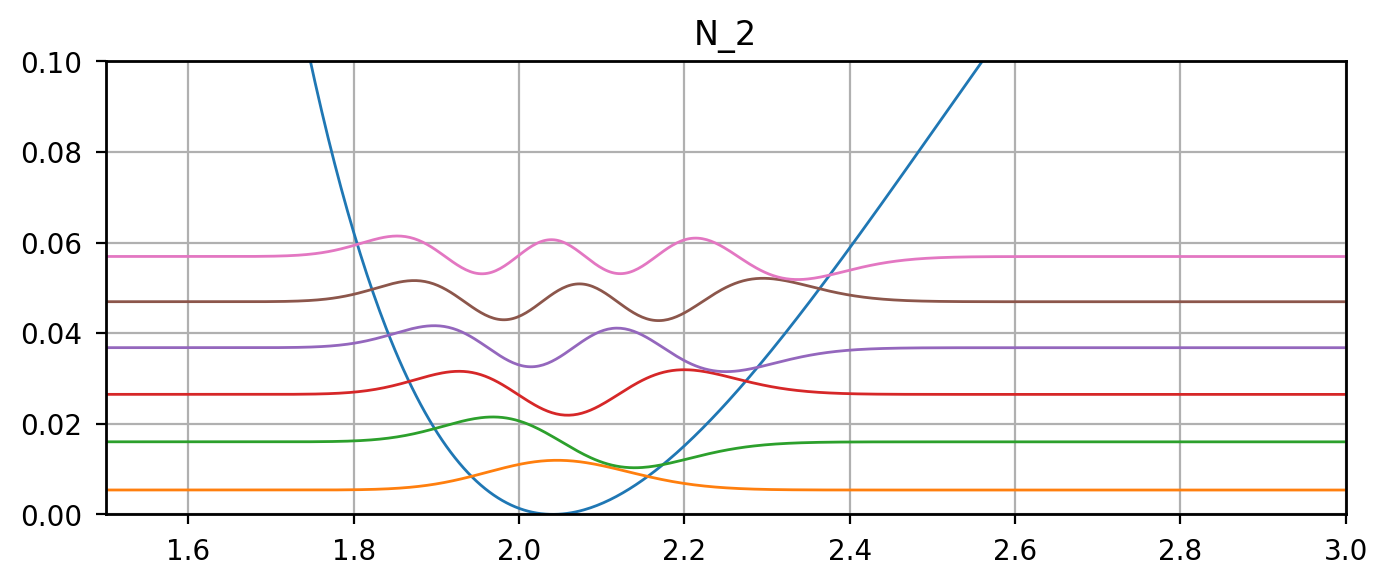

In [69]:
hartree = 4.359744*10**(-18)
avogadro = 6.0223*10**(23)
mass = 9.109383*10**(-31)
bohr = 5.291772*10**(-11)
m_prot = 1836.15*7

U_0= 943000/(hartree*avogadro)
r_0 = 1.08*10**(-10)/bohr
a = 2.73*10**(10)*bohr


# Use the same values as in Example 6.6
N = 1000
x_min = 0.4
x_max = 3
dx = (x_max - x_min)/(N-1)
r = np.arange(x_min, x_max+dx, dx)

# Set the potential
#a = 1
#b = 1.5
#c = 0.2
#d = 1.17

U = U_0*(np.exp((-2*a*(r-r_0))) -2*np.exp((-a*(r-r_0)))) + U_0

# We define a N-by-N zero matrix:
H = np.zeros((N, N))

# Set the non-zero elements of the matrix:
for i in range(N):
    H[i][i] = (1/dx**2/m_prot+U[i])
    if i > 0:
        H[i][i-1] = -1/(2*dx**2*m_prot)
    if i < N-1:
        H[i][i+1] = -1/(2*dx**2*m_prot)

# Determine the eigenenergies and the eigenvectors
E, psi = linalg.eigh(H)

# Print the 5 first eigenvalues:
for i in range(6):
    Estr = "E" + str(i) + ": "
    print(Estr, E[i]*hartree)


# Set common figure parameters:
newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (8, 3),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 10, 'legend.frameon': False, 
             'legend.handlelength': 1.5, 'figure.dpi': 200}
plt.rcParams.update(newparams)

psi = psi/20

plt.figure()
plt.title("N_2")
plt.plot(r,U)
plt.xlim([1.5,3])
plt.ylim([0,0.1])
for i in range(6): 
    plt.plot(r, psi[:, i] + E[i])
plt.grid()


